# Simple Digit Classification with Deep Learning Model

#### Abu Saleh Mosa Faisal
#### Graduate Student Researcher
#### New Mexico Tech

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In C:\Users\afais\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\afais\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\afais\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\afais\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\afais\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

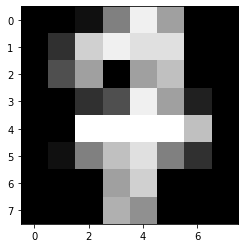

In [4]:
idx = 17
plt.imshow(digits['images'][idx], cmap=plt.cm.gray, interpolation='none')

In [5]:
digits['target'][idx]

7

In [6]:
digits['images'].shape

(1797, 8, 8)

In [7]:
digits['data'].shape

(1797, 64)

In [8]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

In [9]:
X = digits['data']
y = digits['target']

In [10]:
y = np_utils.to_categorical(y)

In [11]:
y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
in_dim = X.shape[1]
out_dim = y.shape[1]

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [31]:
model = Sequential()
model.add(Dense(128, input_shape=(in_dim,)))
model.add(Activation('relu'))
model.add(Dense(out_dim))
model.add(Activation('sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
model.fit(X_train, y_train)

45/45 [==============================] - 0s 1ms/step - loss: 4.9137 - accuracy: 0.2568


In [33]:
loss, accuracy = model.evaluate(X_test, y_test)
accuracy

12/12 [==============================] - 0s 15ms/step - loss: 0.6823 - accuracy: 0.7778


0.7777777910232544

In [34]:
model.predict(X_test[:3])

array([[9.0934932e-01, 1.7508799e-01, 9.8348427e-01, 9.8890680e-01,
        3.3971667e-04, 6.0736382e-01, 2.7446702e-01, 1.2410283e-02,
        3.6425894e-01, 1.7532572e-01],
       [5.2597195e-02, 1.1624843e-01, 9.8832822e-01, 3.7270153e-01,
        5.8749020e-02, 7.7510250e-01, 1.4832884e-02, 1.5463531e-03,
        8.9191878e-01, 6.9847822e-02],
       [7.0280135e-03, 9.9540234e-01, 5.4600328e-02, 1.3694853e-01,
        7.1324056e-01, 2.9213309e-02, 1.0953456e-02, 1.1769235e-03,
        9.6927041e-01, 6.5056694e-01]], dtype=float32)

In [35]:
model.predict(X_test[:3]).argmax(axis=1)

array([3, 2, 1], dtype=int64)

In [36]:
y_test[:3].argmax(axis=1)

array([2, 2, 1], dtype=int64)

In [37]:
model.save('digits.h5')

In [38]:
from keras.models import load_model
model1 = load_model('digits.h5')

In [39]:
model1.predict(X_test[:3]).argmax(axis=1)

array([3, 2, 1], dtype=int64)